In [1]:
# load libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data and view
data = pd.read_csv('modeling_data.csv', index_col=0)
data.head()

,Reported.Year,Property.ID..,Commercial.Property..Property.Street.Address,Building.Name,Total.SqFt,Category,Year.Built,kWh.sqft,Percentile.Rank,Received.Date,...,GeoLocation,Submitted.Name.of.Organization,GeoLocation_clean,lat,long,NearbyTreeSpecies,cluster,BestTreeSpecies,Category_encoded,BestTreeSpecies_encoded
0,2017.0,187746,"5126 E 5 ST, AUSTIN TX,","5126 E 5 ST, AUSTIN TX,",7419.0,NaN,1940,0.000,NaN,NaN,...,"5126 E 5 ST\nAUSTIN, TX\n(30.251707, -97.697313)","Pantur, Inc.","30.251707, -97.697313",30.251707,-97.697313,"Willow, Oak, Hackberry, Mesquite, Oak, Oak, Ha...",2,Pecan,27,20
1,2017.0,230740,"2500 RIDGEPOINT DR, AUSTIN TX, 78728","2500 RIDGEPOINT DR, AUSTIN TX, 78728",49024.0,INDUSTRIAL (W/sqft > 3),1983,15.580,39.58,NaN,...,"2500 RIDGEPOINT DR\nAUSTIN, TX 78728\n(30.3280...",Equitable Commercial Realty,"30.328069, -97.672401",30.328069,-97.672401,Oak,2,Oak,10,18
2,2017.0,729528,"1700 S PLEASANT VALLEY RD, AUSTIN TX, 78741","1700 S PLEASANT VALLEY RD, AUSTIN TX, 78741",101953.0,STORE\GROCERY (W/sqft > 5),2009,32.063,76.26,NaN,...,"1700 S PLEASANT VALLEY RD\nAUSTIN, TX 78741\n(...","Mimco, Inc.","30.236494, -97.721013",30.236494,-97.721013,"Crape Myrtle, Oak, Oak, Crape Myrtle, Crape My...",1,Oak,24,18
3,2017.0,526381,2011 W RUNDBERG LN Austin TX 78758,2011 W RUNDBERG LN Austin TX 78758,146142.0,OFFICE LG > 35000,1999,8.049,4.79,NaN,...,"2011 W RUNDBERG LN\nAustin, TX 78758\n(30.3737...",AISD,"30.373732, -97.719236",30.373732,-97.719236,"Oak, Oak, Pecan, Pecan, Sycamore, Pear, Pear, ...",2,Oak,16,18
4,2017.0,200001,"202 W 17 ST, AUSTIN TX, 78701","202 W 17 ST, AUSTIN TX, 78701",15350.0,OFFICE MED 10-35,1998,100.129,NaN,NaN,...,"202 W 17 ST\nAUSTIN, TX 78701\n(30.279196, -97...",Charter Communications,"30.279196, -97.740475",30.279196,-97.740475,"Pecan, Oak, Crape Myrtle, Crape Myrtle, Pecan,...",2,Oak,18,18


In [3]:
# Define features and target - update these based on the structure of modeling_data.csv
features = data[['Total.SqFt', 'Category_encoded', 'Year.Built', 'kWh.sqft', 'lat', 'long']]  # Modify if there are additional or better features
target = data['BestTreeSpecies_encoded']

# convert to numeric
features = features.apply(pd.to_numeric)

In [4]:
features.head()

,Total.SqFt,Category_encoded,Year.Built,kWh.sqft,lat,long
0,7419.0,27,1940,0.000,30.251707,-97.697313
1,49024.0,10,1983,15.580,30.328069,-97.672401
2,101953.0,24,2009,32.063,30.236494,-97.721013
3,146142.0,16,1999,8.049,30.373732,-97.719236
4,15350.0,18,1998,100.129,30.279196,-97.740475


In [5]:
# check for NA values
features.isna().sum()

Total.SqFt          0
Category_encoded    0
Year.Built          0
kWh.sqft            0
lat                 0
long                0
dtype: int64

In [6]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [7]:
model = LogisticRegression(max_iter = 5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [8]:
y_pred = model.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 69.65%


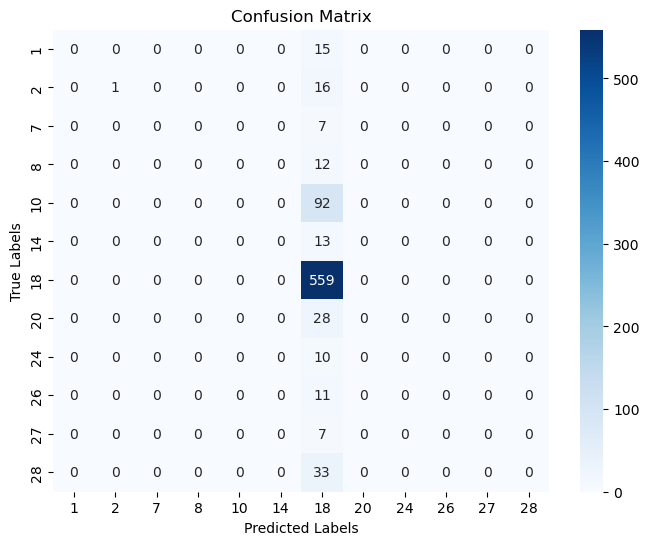

In [10]:
class_labels = np.unique(y_test)

# Create confusion matrix with explicit class labels
conf_matrix = confusion_matrix(y_test, y_pred, labels=class_labels)

# Visualize confusion matrix with the correct class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()